<h1>Задача для коллоквиума №2.</h1>

Определить зависимость вероятности образования молекул от температуры фотонной спиновой моды.

То есть необходимо построить график $p_{mol}(t)$ - вероятность возникновения молекулы от времени и найти асимптоту $p_m(T_s)$ к которой этот график стремится.

<h2>Описание процесса</h2>

$\gamma_{in}$ и $\gamma_{out}$ - интенсивности притока и стока фотонов соответственно.
Их отношение положим в: $\mu = \frac{\gamma_{in}}{\gamma_{out}}$

Термически стабильное состояния поля этой моды имеет вид:
$$G_T = c\cdot \sum_{n=0}^{\infty}e^{-\frac{\hbar\omega n}{kT}}|n><n|$$ где $e^{-\frac{\hbar\omega n}{kT}}=p_n$, $c\cdot \sum_{n=0}^{\infty}p_n = 1$ - отсюда можно найти $c$, используя свойства суммы геометрической прогрессии:
$$c = \frac{1}{\sum_{n=0}^{\infty}(\frac{1}{e^{\frac{\hbar\omega}{kT}}})^n}=\frac{1}{\frac{1}{1-\frac{1}{e^{\frac{\hbar\omega}{kT}}}}}=1-\frac{1}{e^{\frac{\hbar\omega}{kT}}}=1-\gamma_{in}/\gamma_{out}$$

Из уравнения $e^{-\frac{\hbar\omega}{kT}}=\mu<1$ можно выразить $T=\frac{\hbar\omega}{k\ln (\gamma_{out}/\gamma_{in})}$.

Далее определим $n_{ср} = c\cdot \sum_{n=0}^{\infty}n\cdot e^{-\frac{\hbar\omega n}{kT}}$ и подберем входные параметры так, чтобы выполнялось $\sqrt{n_{ср}}\approx\sqrt{n_{ср} + 1}\approx\sqrt{n_{ср} - 1}$, то есть $n_{ср}$ должно быть достаточно большим, например $n_{ср}=100$.

$$n_{ср} = c\cdot\frac{e^{\frac{\hbar\omega}{kT}}}{(e^{\frac{\hbar\omega}{kT}}-1)^2} \text{при } e^{Re(\frac{\hbar\omega}{kT})}>1$$

что равносильно
$$n_{ср}=c\cdot\frac{\frac{\gamma_{out}}{\gamma_{in}}}{(\frac{\gamma_{out} - \gamma_{in}}{\gamma_{in}})^2}=\frac{\frac{\gamma_{out}}{\gamma_{in}}}{\frac{\gamma_{out} - \gamma_{in}}{\gamma_{in}}}=\frac{\gamma_{out}}{\gamma_{out} - \gamma_{in}} \text{ при } |\frac{\gamma_{out}}{\gamma_{in}}|>1$$

Тогда, учитывая не малость $n_{ср}$ можно упростить выражение:
$$g(a^{+}\sigma+a\sigma^{+})\approx g_0\sqrt{n_{ср}}(\sigma+\sigma^{+})$$

<h2>Модель в задаче</h2>

Рассматриваемая модель: $|n_s>|s>|m>|cov>$, где $n_s$ - количество фотонов, $s$ - спиновое состояние (0 - если спины разные), $m$ - количество фононов, $cov$ - наличие ковалентной связи (0 если связь есть).

Но мы применяем упрощение: $n_s = n_{ср}$, и имеем трехкубитный базис: $|s>|m>|cov>$.

Начальное состояние: $|1>|0>|1>$
Молекулярное состояние: $|0>|0>|0>$

Базис получился состоящим из 4-х векторов:
1) $|0>|0>|0>$
2) $|0>|0>|1>$
3) $|0>|1>|0>$
4) $|1>|0>|1>$

В таком базисе матрица перехода (Гамильтониан) получается в следующем виде:
$$H = \hbar\omega_s a_s^{+}a_s + \hbar\omega_c b^{+}b + \hbar\omega_c\sigma_c^{+}\sigma_c + g_s(\sigma_s^{+}+\sigma_s)_{check cov}+\hbar\omega_s\sigma_s^{+}\sigma_s + g_{cov}(b^{+}\sigma_c+b\sigma_c^{+})_{check spin}\text{, где } g_s=g_0\sqrt{n_{ср}}$$

В упрощенном варианте (все g считаем равными) должно получиться что-то такое:
$$H = \begin{pmatrix}
0 & 0 & 0 & 0 \\
0 & \hbar\omega & g & g*\sqrt{n_{ср}} \\
0 & g & \hbar\omega & 0 \\
0 & g*\sqrt{n_{ср}} & 0 & \hbar\omega \\
\end{pmatrix}$$

Квантовое основное уравнение: $$i\hbar\dot{\rho}=[H, \rho]+i\mathcal{L}(\rho)$$
где $\mathcal{L}(\rho)=\sum_j \gamma_j(A_j\rho A_j^{+} - \frac{1}{2} \{A_j^{+}A_j, \rho\})$

Матричное дифференциальное уравнение можно промоделировать следующим образом:
$$\rho(t+\Delta t) = \rho(t) - \frac{i\Delta t}{\hbar} [H, \rho] + \frac{\Delta t}{\hbar}\mathcal{L}(\rho)$$

Получается всего 4 фактора декогерентности: $A_{out} = a$, $A_{in} = a^{+}$, $b$ и $b^{+}$

$$b=\begin{pmatrix}
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
\end{pmatrix}$$

Но в модели рассматривается усредненное количество фотонов, поэтому первые два фактора не меняют состояния в нашем базисе.

References:
https://vql.cs.msu.ru/quantum%20computations%20course%20rus.pdf
https://arxiv.org/pdf/1906.04478.pdf

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def quantum_state(state, sorted_states):
        pos = -1
        for idx, cur_state in enumerate(sorted_states):
            if np.array_equal(state, cur_state):
                pos = idx
        n = len(sorted_states)
        result = np.zeros(n).astype(np.cdouble)
        if pos == -1:
            return None
        result[pos] = 1
        return result.reshape((-1, 1))


def get_density_from_state(state):
    return np.multiply(state, np.conjugate(state)[:,0])


def get_commutator(first_matrix, second_matrix):
    return np.dot(first_matrix, second_matrix) - np.dot(second_matrix, first_matrix)


def get_anti_commutator(first_matrix, second_matrix):
    return np.dot(first_matrix, second_matrix) + np.dot(second_matrix, first_matrix)


def get_rho_norm(rho):
    norm1_rho = (rho + np.conjugate(rho).T) / 2
    norm2_rho = norm1_rho / np.sum(np.abs(np.diag(norm1_rho)))
    return norm2_rho


def complex_conjugate(matrix):
    return np.conjugate(matrix).T


def get_probability_from_density(density_matrix, wanted_state):
    return float(np.linalg.norm(np.diagonal(density_matrix) * wanted_state[:,0]))

In [15]:
def get_c_const(h, omega, k, t):
    return 1 - np.exp(-1 * h * omega / (k * t))

def get_n_average(h, omega, k, t):
    return 1 / (np.exp(h * omega / (k * t)) - 1)

In [18]:
def get_hamiltonian(h, omega, k, t, g):
    H1 = np.array([[0, 0, 0, 0],
                   [0, h*omega, g, 0],
                   [0, g, h*omega, 0],
                   [0, 0, 0, h*omega]]).astype(np.cdouble)
    H2 = np.array([[0, 0, 0, 0],
                   [0, 0, 0, 1],
                   [0, 0, 0, 0],
                   [0, 1, 0, 0]]).astype(np.cdouble)
    return H1 + (np.sqrt(get_n_average(h, omega, k, t) * g) * H2)

In [19]:
get_hamiltonian(1, 1, 1, 273, 1)

array([[ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j],
       [ 0.        +0.j,  1.        +0.j,  1.        +0.j,
        16.50758326+0.j],
       [ 0.        +0.j,  1.        +0.j,  1.        +0.j,
         0.        +0.j],
       [ 0.        +0.j, 16.50758326+0.j,  0.        +0.j,
         1.        +0.j]])

In [36]:
def get_graph(init_state_base, mol_state_base, time_delta, t_max, gamma_0, gamma_1, h, omega, k, t, g):
    H = get_hamiltonian(h, omega, k, t, g)

    latest_rho_first = get_density_from_state(init_state_base)

    b_const = \
        np.array([[0, 0, 1, 0],
                  [0, 0, 0, 1],
                  [0, 0, 0, 0],
                  [0, 0, 0, 0]]).astype(np.cdouble)
    b_cross_const = complex_conjugate(b_const)
    b_cross_b_const = b_cross_const @ b_const
    b_b_cross_const = b_const @ b_cross_const

    cur_t = 0
    t_list = []
    first_solution_list = []
    percents_to_print = [0, 1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    latest_percent_done = -1

    while cur_t < t_max:
        # Main Equation Solution
        first_solution = get_probability_from_density(latest_rho_first, mol_state_base)
        linblad = gamma_0 * (b_const @ latest_rho_first @ b_cross_const - 0.5 * get_anti_commutator(b_cross_b_const, latest_rho_first)) #+ \
                  #gamma_1 * (b_cross_const @ latest_rho_first @ b_const - 0.5 * get_anti_commutator(b_b_cross_const, latest_rho_first))
        latest_rho_first = latest_rho_first - (1j * time_delta / h) * get_commutator(H, latest_rho_first) + time_delta / h * linblad
        latest_rho_first = get_rho_norm(latest_rho_first)
        # print
        cur_percent = round(cur_t * 100 / t_max)
        if cur_percent != latest_percent_done and cur_percent in percents_to_print:
            print(f"Done {cur_percent}%", cur_t, first_solution)
            latest_percent_done = cur_percent
        first_solution_list.append(first_solution)
        t_list.append(cur_t)
        cur_t += time_delta
    return t_list, first_solution_list

In [37]:
def print_graph(t, list_of_values):
    for values_list, values_name in list_of_values:
        plt.plot(t, values_list, label=values_name)
    plt.title("Moleculo Appearance Probability")
    plt.xlabel("Time")
    plt.ylabel("Probability")
    plt.legend(loc="lower right")
    plt.show()

In [38]:
sorted_states_list = [np.array([0, 0, 0]).astype(np.cdouble).reshape((-1, 1)),
                      np.array([0, 0, 1]).astype(np.cdouble).reshape((-1, 1)),
                      np.array([0, 1, 0]).astype(np.cdouble).reshape((-1, 1)),
                      np.array([1, 0, 1]).astype(np.cdouble).reshape((-1, 1))]

initial_state_base = quantum_state(np.array([1, 0, 1]).astype(np.cdouble).reshape((-1, 1)), sorted_states_list)
moleculo_state_base = quantum_state(np.array([0, 0, 0]).astype(np.cdouble).reshape((-1, 1)), sorted_states_list)

Done 0% 0 0.0
Done 1% 10.000999999999896 0.02166483331056321
Done 2% 30.00000000001368 0.0567794064553975
Done 5% 90.00000000006568 0.15472601986254736
Done 10% 190.00000000054317 0.29589425526816987
Done 20% 390.0009999976896 0.5114400430678658
Done 30% 590.0009999929603 0.6610008234288877
Done 40% 790.0009999882309 0.7647771986113685
Done 50% 990.0009999835015 0.836784953719468
Done 60% 1190.0009999787721 0.8867492812129869
Done 70% 1390.0009999740428 0.921418241773308
Done 80% 1590.0009999693134 0.9454741409843798
Done 90% 1790.000999964584 0.9621659101490874
Done 100% 1990.0009999598547 0.9737478990576406


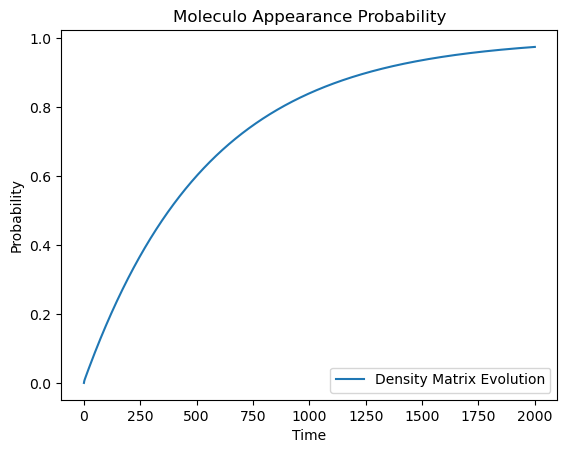

In [41]:
%matplotlib inline
# %matplotlib notebook
t_lst, first_solution_lst = get_graph(init_state_base=initial_state_base,
                                      mol_state_base=moleculo_state_base,
                                      time_delta=1e-3,
                                      t_max=2000,
                                      gamma_0=1,
                                      gamma_1=1,
                                      h=1,
                                      omega=1,
                                      k=1,
                                      t=273,
                                      g=1)

print_graph(t_lst, [(first_solution_lst, "Density Matrix Evolution")])

Done 0% 0 0.0
Done 1% 6.250000000000422 0.01769732286076748
Done 2% 18.750999999999934 0.04396563629141523
Done 5% 56.2509999999596 0.11861678112062947
Done 10% 118.75000000020296 0.23030609096713964
Done 20% 243.75000000079982 0.41302080101291777
Done 30% 368.75099999819207 0.5523625313667045
Done 40% 493.7509999952362 0.6586254877537917
Done 50% 618.7509999922804 0.73966308502471
Done 60% 743.7509999893246 0.8014634752521644
Done 70% 868.7509999863687 0.8485933058602534
Done 80% 993.7509999834128 0.884535165207292
Done 90% 1118.750999980457 0.9119449232449264
Done 100% 1243.7509999775011 0.9328479830568179
Done 0% 0 0.0
Done 1% 6.250000000000422 0.01630395758904142
Done 2% 18.750999999999934 0.04053139608169563
Done 5% 56.2509999999596 0.10969295099966463
Done 10% 118.75000000020296 0.21406052348808496
Done 20% 243.75000000079982 0.38752840338521877
Done 30% 368.75099999819207 0.5227104382751402
Done 40% 493.7509999952362 0.6280549474183759
Done 50% 618.7509999922804 0.71014844397603

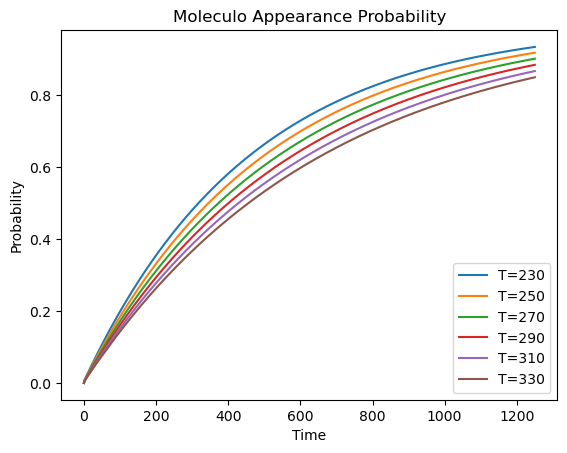

In [40]:
%matplotlib inline
# %matplotlib notebook
results_list = []
for T in range(230, 350, 20):
    t_lst, first_solution_lst = get_graph(init_state_base=initial_state_base,
                                          mol_state_base=moleculo_state_base,
                                          time_delta=1e-3,
                                          t_max=1250,
                                          gamma_0=1,
                                          gamma_1=1,
                                          h=1,
                                          omega=1,
                                          k=1,
                                          t=T,
                                          g=1)
    results_list.append((first_solution_lst, f"T={T}"))

print_graph(t_lst, results_list)

Done 0% 0 0.0
Done 1% 6.250000000000422 0.06542903860770588
Done 2% 18.750999999999934 0.15697240296662873
Done 5% 56.2509999999596 0.38124372419021624
Done 10% 118.75000000020296 0.6304672694894905
Done 20% 243.75000000079982 0.8682009330782021
Done 30% 368.75099999819207 0.9529923892058426
Done 40% 493.7509999952362 0.9832340717631868
Done 50% 618.7509999922804 0.9940201949239053
Done 60% 743.7509999893246 0.9978672180720914
Done 70% 868.7509999863687 0.999239313206011
Done 80% 993.7509999834128 0.9997286903124144
Done 90% 1118.750999980457 0.999903233568455
Done 100% 1243.7509999775011 0.9999654868856425
Done 0% 0 0.0
Done 1% 6.250000000000422 0.03646142263182014
Done 2% 18.750999999999934 0.08941969197978725
Done 5% 56.2509999999596 0.2313861130579228
Done 10% 118.75000000020296 0.42053551751585116
Done 20% 243.75000000079982 0.6706481666483104
Done 30% 368.75099999819207 0.8128062320727653
Done 40% 493.7509999952362 0.8936041594912917
Done 50% 618.7509999922804 0.9395275013538118


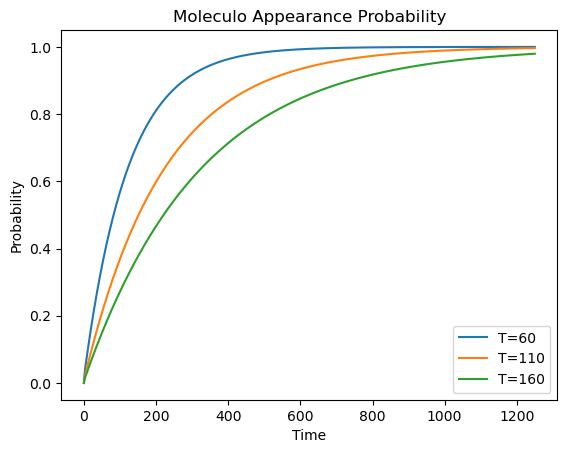

In [43]:
%matplotlib inline
# %matplotlib notebook
results_list = []
for T in range(60, 200, 50):
    t_lst, first_solution_lst = get_graph(init_state_base=initial_state_base,
                                          mol_state_base=moleculo_state_base,
                                          time_delta=1e-3,
                                          t_max=1250,
                                          gamma_0=1,
                                          gamma_1=1,
                                          h=1,
                                          omega=1,
                                          k=1,
                                          t=T,
                                          g=1)
    results_list.append((first_solution_lst, f"T={T}"))

print_graph(t_lst, results_list)

Done 0% 0 0.0
Done 1% 6.250000000000422 0.8460213620927857
Done 2% 18.750999999999934 0.9968872265198006
Done 5% 56.2509999999596 0.9999999718320394
Done 10% 118.75000000020296 0.9999999999999999
Done 20% 243.75000000079982 1.0
Done 30% 368.75099999819207 1.0
Done 40% 493.7509999952362 1.0
Done 50% 618.7509999922804 1.0
Done 60% 743.7509999893246 1.0
Done 70% 868.7509999863687 1.0
Done 80% 993.7509999834128 1.0
Done 90% 1118.750999980457 1.0
Done 100% 1243.7509999775011 1.0
Done 0% 0 0.0
Done 1% 6.250000000000422 0.07623152458633176
Done 2% 18.750999999999934 0.18163416823701561
Done 5% 56.2509999999596 0.43087637496496994
Done 10% 118.75000000020296 0.6893228095017343
Done 20% 243.75000000079982 0.9074222830901644
Done 30% 368.75099999819207 0.972413325089111
Done 40% 493.7509999952362 0.9917795336816072
Done 50% 618.7509999922804 0.9975504091482531
Done 60% 743.7509999893246 0.9992700541418756
Done 70% 868.7509999863687 0.9997824857341328
Done 80% 993.7509999834128 0.9999351836094018

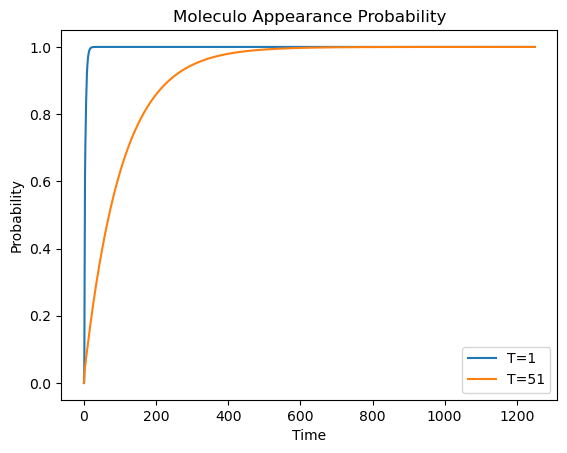

In [39]:
%matplotlib inline
# %matplotlib notebook
results_list = []
for T in range(1, 60, 50):
    t_lst, first_solution_lst = get_graph(init_state_base=initial_state_base,
                                          mol_state_base=moleculo_state_base,
                                          time_delta=1e-3,
                                          t_max=1250,
                                          gamma_0=1,
                                          gamma_1=1,
                                          h=1,
                                          omega=1,
                                          k=1,
                                          t=T,
                                          g=1)
    results_list.append((first_solution_lst, f"T={T}"))

print_graph(t_lst, results_list)